In [62]:
# General python imports
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Attention:

Keep always the Cobaya documentation open: https://cobaya.readthedocs.io

# Exercise 1:

### Use the Metropolis-Hastings MCMC sampler of Cobaya to sample a simple posterior distribution

In this exercise, we aim to sample the posterior distribution corresponding to the product of a gaussian mixture likelihood in Cobaya (see https://cobaya.readthedocs.io/en/latest/likelihood_gaussian_mixture.html) using simple priors for the parameters.

For that, you need to fill up the blocks `likelihood`, `params` and `sampler` of the configuration dictionary and then run Cobaya.

In [68]:
# Fill the configuration dictionary called 'info' below

info = {
# We import the likelihood from Cobaya likelihood libraries
# 'likelihood': Cobaya's protected key of the input dictionary
# The goal is to use a gaussian mixture so you need to define
# the means and a covariance matrix
    "likelihood": {
        "gaussian_mixture" : {
            "means": [0.2,0],
            "covs": [[0.1,0.05],
                      [0.05,0.2]],
            "derived":True}},
# 'params': Cobaya's protected key of the input dictionary.
# Includes the parameters that the user would like to sample over


# You need to define two parameters a and b which are the means
# of the gaussian mixture function above
# with their corresponding priors
#
# use a uniform distribution for a and a gaussian distribution for b
# check Cobaya documentation to see how we do define priors
    "params":dict([
        ("a",{
            "prior":{"min":-0.5,"max":3},
            "latex":r"\alpha"}),
          ("b",{
            "prior":{"dist":"norm","loc":0,"scale":1},
            "ref":0,
            "proposal":0.5,
            "latex":r"\beta"}),
          ("hyperparam_a",{
              "latex":r"\alpha^\prime"}),
          ("derived_b", {
              "latex":r"\beta^\prime"})]),
# 'sampler': Cobaya's protected key of the input dictionary.
# you can choose the sampler you want to use.
# Check Cobaya's documentation to see the list of available samplers
# Here, we would like to use the usual Metropolis Hastings MC sampler
    "sampler": {
        "mcmc": None},
# 'force': Cobaya's protected key of the input dictionary.
# 'force': True, Cobaya forces deleting the previous output files, if found, with the same name
    "force": True,
# 'debug': Cobaya's protected key of the input dictionary.
# how much information you want Cobaya to print? If debug: True, it prints every single detail
# that is going on internally in Cobaya
    "debug": False,
# 'output': Cobaya's protected key of the input dictionary.
# Where are the results going to be stored, in case that the sampler produce output files?
# For example: chains...
# modify the path below within 'output' to choose a name and a directory for those files
    "output": "chains_exercise1"}

In [9]:
!pip install cobaya

In [10]:
!pip install -U setuptools

In [11]:
!cobaya-install cosmo -p .

[install] Installing basic cosmological packages.
[install] Installing external packages at '/content'
[install] The installation path has been written into the global config file: /root/.config/cobaya/config.yaml

theory:camb

[install] Checking if dependencies have already been installed...
[install] External dependencies for this component already installed.
[install] Doing nothing.

theory:classy

[install] Checking if dependencies have already been installed...
[install] Version check failed: Module classy at /content/code/classy/build/lib.linux-x86_64-cpython-312/classy is version (non-given) but the minimum required version is v3.2.1.
[install] Skipping because '--upgrade' not requested.

likelihood:planck_2018_lowl.TT

[install] Checking if dependencies have already been installed...
[install] External dependencies for this component already installed.
[install] Doing nothing.

likelihood:planck_2018_lowl.EE

[install] Checking if dependencies have already been installed...
[in

In [12]:
!pip install classy

In [69]:
#  We import Cobaya
from cobaya.run import run
# Now we run!
updated_info, sampler = run(info)

INFO:output:Output to be read-from/written-into folder '.', with prefix 'chains_exercise1'


[output] Output to be read-from/written-into folder '.', with prefix 'chains_exercise1'


INFO:output:Found existing info files with the requested output prefix: 'chains_exercise1'


[output] Found existing info files with the requested output prefix: 'chains_exercise1'


INFO:output:Will delete previous products ('force' was requested).


[output] Will delete previous products ('force' was requested).


INFO:mcmc:Getting initial point... (this may take a few seconds)


[mcmc] Getting initial point... (this may take a few seconds)


INFO:prior:Reference values or pdfs for some parameters were not provided. Sampling from the prior instead for those parameters.


[prior] Reference values or pdfs for some parameters were not provided. Sampling from the prior instead for those parameters.


INFO:mcmc:Initial point: a:1.719779, b:0


[mcmc] Initial point: a:1.719779, b:0


INFO:model:Measuring speeds... (this may take a few seconds)


[model] Measuring speeds... (this may take a few seconds)


INFO:model:Setting measured speeds (per sec): {gaussian_mixture: 6090.0}


[model] Setting measured speeds (per sec): {gaussian_mixture: 6090.0}


[prior] *WARNING* Reference pdf not defined or improper for some parameters. Using prior's sigma instead for them.


INFO:mcmc:Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).


[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).


INFO:mcmc:Sampling!


[mcmc] Sampling!


INFO:mcmc:Progress @ 2025-08-28 14:45:10 : 1 steps taken, and 0 accepted.


[mcmc] Progress @ 2025-08-28 14:45:10 : 1 steps taken, and 0 accepted.


INFO:mcmc:Learn + convergence test @ 80 samples accepted.


[mcmc] Learn + convergence test @ 80 samples accepted.


INFO:mcmc: - Acceptance rate: 0.192


[mcmc]  - Acceptance rate: 0.192


INFO:mcmc: - Convergence of means: R-1 = 0.300618 after 64 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.300618 after 64 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 160 samples accepted.


[mcmc] Learn + convergence test @ 160 samples accepted.


INFO:mcmc: - Acceptance rate: 0.254


[mcmc]  - Acceptance rate: 0.254


INFO:mcmc: - Convergence of means: R-1 = 0.215661 after 128 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.215661 after 128 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 240 samples accepted.


[mcmc] Learn + convergence test @ 240 samples accepted.


INFO:mcmc: - Acceptance rate: 0.281


[mcmc]  - Acceptance rate: 0.281


INFO:mcmc: - Convergence of means: R-1 = 0.066142 after 192 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.066142 after 192 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 320 samples accepted.


[mcmc] Learn + convergence test @ 320 samples accepted.


INFO:mcmc: - Acceptance rate: 0.304


[mcmc]  - Acceptance rate: 0.304


INFO:mcmc: - Convergence of means: R-1 = 0.055656 after 256 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.055656 after 256 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 400 samples accepted.


[mcmc] Learn + convergence test @ 400 samples accepted.


INFO:mcmc: - Acceptance rate: 0.304


[mcmc]  - Acceptance rate: 0.304


INFO:mcmc: - Convergence of means: R-1 = 0.146475 after 320 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.146475 after 320 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 480 samples accepted.


[mcmc] Learn + convergence test @ 480 samples accepted.


INFO:mcmc: - Acceptance rate: 0.308


[mcmc]  - Acceptance rate: 0.308


INFO:mcmc: - Convergence of means: R-1 = 0.085269 after 384 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.085269 after 384 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 560 samples accepted.


[mcmc] Learn + convergence test @ 560 samples accepted.


INFO:mcmc: - Acceptance rate: 0.314


[mcmc]  - Acceptance rate: 0.314


INFO:mcmc: - Convergence of means: R-1 = 0.055511 after 448 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.055511 after 448 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 640 samples accepted.


[mcmc] Learn + convergence test @ 640 samples accepted.


INFO:mcmc: - Acceptance rate: 0.316


[mcmc]  - Acceptance rate: 0.316


INFO:mcmc: - Convergence of means: R-1 = 0.062250 after 512 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.062250 after 512 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 720 samples accepted.


[mcmc] Learn + convergence test @ 720 samples accepted.


INFO:mcmc: - Acceptance rate: 0.320


[mcmc]  - Acceptance rate: 0.320


INFO:mcmc: - Convergence of means: R-1 = 0.031070 after 576 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.031070 after 576 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 800 samples accepted.


[mcmc] Learn + convergence test @ 800 samples accepted.


INFO:mcmc: - Acceptance rate: 0.320


[mcmc]  - Acceptance rate: 0.320


INFO:mcmc: - Convergence of means: R-1 = 0.048818 after 640 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.048818 after 640 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 880 samples accepted.


[mcmc] Learn + convergence test @ 880 samples accepted.


INFO:mcmc: - Acceptance rate: 0.318


[mcmc]  - Acceptance rate: 0.318


INFO:mcmc: - Convergence of means: R-1 = 0.039952 after 704 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.039952 after 704 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 960 samples accepted.


[mcmc] Learn + convergence test @ 960 samples accepted.


INFO:mcmc: - Acceptance rate: 0.319


[mcmc]  - Acceptance rate: 0.319


INFO:mcmc: - Convergence of means: R-1 = 0.010003 after 768 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.010003 after 768 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 1040 samples accepted.


[mcmc] Learn + convergence test @ 1040 samples accepted.


INFO:mcmc: - Acceptance rate: 0.318


[mcmc]  - Acceptance rate: 0.318


INFO:mcmc: - Convergence of means: R-1 = 0.011367 after 832 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.011367 after 832 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 1120 samples accepted.


[mcmc] Learn + convergence test @ 1120 samples accepted.


INFO:mcmc: - Acceptance rate: 0.318


[mcmc]  - Acceptance rate: 0.318


INFO:mcmc: - Convergence of means: R-1 = 0.023160 after 896 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.023160 after 896 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 1200 samples accepted.


[mcmc] Learn + convergence test @ 1200 samples accepted.


INFO:mcmc: - Acceptance rate: 0.317


[mcmc]  - Acceptance rate: 0.317


INFO:mcmc: - Convergence of means: R-1 = 0.020332 after 960 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.020332 after 960 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 1280 samples accepted.


[mcmc] Learn + convergence test @ 1280 samples accepted.


INFO:mcmc: - Acceptance rate: 0.314


[mcmc]  - Acceptance rate: 0.314


INFO:mcmc: - Convergence of means: R-1 = 0.015405 after 1024 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.015405 after 1024 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 1360 samples accepted.


[mcmc] Learn + convergence test @ 1360 samples accepted.


INFO:mcmc: - Acceptance rate: 0.311


[mcmc]  - Acceptance rate: 0.311


INFO:mcmc: - Convergence of means: R-1 = 0.015093 after 1088 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.015093 after 1088 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 1440 samples accepted.


[mcmc] Learn + convergence test @ 1440 samples accepted.


INFO:mcmc: - Acceptance rate: 0.307


[mcmc]  - Acceptance rate: 0.307


INFO:mcmc: - Convergence of means: R-1 = 0.008032 after 1152 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.008032 after 1152 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 1520 samples accepted.


[mcmc] Learn + convergence test @ 1520 samples accepted.


INFO:mcmc: - Acceptance rate: 0.307


[mcmc]  - Acceptance rate: 0.307


INFO:mcmc: - Convergence of means: R-1 = 0.013225 after 1216 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.013225 after 1216 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 1600 samples accepted.


[mcmc] Learn + convergence test @ 1600 samples accepted.


INFO:mcmc: - Acceptance rate: 0.306


[mcmc]  - Acceptance rate: 0.306


INFO:mcmc: - Convergence of means: R-1 = 0.019373 after 1280 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.019373 after 1280 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 1680 samples accepted.


[mcmc] Learn + convergence test @ 1680 samples accepted.


INFO:mcmc: - Acceptance rate: 0.310


[mcmc]  - Acceptance rate: 0.310


INFO:mcmc: - Convergence of means: R-1 = 0.012803 after 1344 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.012803 after 1344 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 1760 samples accepted.


[mcmc] Learn + convergence test @ 1760 samples accepted.


INFO:mcmc: - Acceptance rate: 0.308


[mcmc]  - Acceptance rate: 0.308


INFO:mcmc: - Convergence of means: R-1 = 0.015285 after 1408 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.015285 after 1408 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 1840 samples accepted.


[mcmc] Learn + convergence test @ 1840 samples accepted.


INFO:mcmc: - Acceptance rate: 0.309


[mcmc]  - Acceptance rate: 0.309


INFO:mcmc: - Convergence of means: R-1 = 0.011023 after 1472 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.011023 after 1472 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 1920 samples accepted.


[mcmc] Learn + convergence test @ 1920 samples accepted.


INFO:mcmc: - Acceptance rate: 0.308


[mcmc]  - Acceptance rate: 0.308


INFO:mcmc: - Convergence of means: R-1 = 0.009145 after 1536 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.009145 after 1536 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 2000 samples accepted.


[mcmc] Learn + convergence test @ 2000 samples accepted.


INFO:mcmc: - Acceptance rate: 0.308


[mcmc]  - Acceptance rate: 0.308


INFO:mcmc: - Convergence of means: R-1 = 0.011150 after 1600 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.011150 after 1600 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 2080 samples accepted.


[mcmc] Learn + convergence test @ 2080 samples accepted.


INFO:mcmc: - Acceptance rate: 0.307


[mcmc]  - Acceptance rate: 0.307


INFO:mcmc: - Convergence of means: R-1 = 0.009563 after 1664 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.009563 after 1664 accepted steps


INFO:mcmc: - Updated covariance matrix of proposal pdf.


[mcmc]  - Updated covariance matrix of proposal pdf.


INFO:mcmc:Learn + convergence test @ 2160 samples accepted.


[mcmc] Learn + convergence test @ 2160 samples accepted.


INFO:mcmc: - Acceptance rate: 0.306


[mcmc]  - Acceptance rate: 0.306


INFO:mcmc: - Convergence of means: R-1 = 0.008178 after 1728 accepted steps


[mcmc]  - Convergence of means: R-1 = 0.008178 after 1728 accepted steps


INFO:mcmc: - Convergence of bounds: R-1 = 0.093628 after 2160 accepted steps


[mcmc]  - Convergence of bounds: R-1 = 0.093628 after 2160 accepted steps


INFO:mcmc:The run has converged!


[mcmc] The run has converged!


INFO:mcmc:Sampling complete after 2160 accepted steps.


[mcmc] Sampling complete after 2160 accepted steps.


### Plot the corresponding distribution using GetDist

Do not forget to open the GetDist html DEMO: https://getdist.readthedocs.io/en/latest/plot_gallery.html

[root] *WARNING* outlier fraction 0.026704545454545453 


In [70]:
chain = sampler.products()

In [31]:
chain["sample"]

      weight  minuslogpost         a         b  hyperparam_a  derived_b  \
0       16.0      2.154240  0.037609  0.029710     -0.513527   0.265114   
1       16.0      2.290136  0.067237 -0.308576     -0.419832  -0.578957   
2        2.0      2.249285  0.174825 -0.288602     -0.079610  -0.659802   
3       14.0      2.234395  0.105249 -0.285463     -0.299630  -0.569139   
4        4.0      2.920974  0.419173 -0.359722      0.693086  -1.121863   
...      ...           ...       ...       ...           ...        ...   
1755     2.0      5.270572 -0.254958  0.620838     -1.438703   2.027865   
1756     3.0      5.547476 -0.070419  0.859299     -0.855139   2.377329   
1757     4.0      5.926230 -0.103055  0.887775     -0.958344   2.484409   
1758     1.0      5.594928 -0.371852  0.516498     -1.808355   1.918159   
1759     1.0      5.135449 -0.398297  0.372639     -1.891980   1.605879   

      minuslogprior  minuslogprior__0      chi2  chi2__gaussian_mixture  
0          2.172143      

In [32]:
chain["sample"]["chi2__gaussian_mixture"]

,chi2__gaussian_mixture
0,-0.035805
1,0.141650
2,0.071876
3,0.043897
4,1.369144
...,...
1755,5.812301
1756,6.013155
1757,6.720911
1758,6.579684


[root] *WARNING* outlier fraction 0.009722222222222222 
Mean:
[ 1.92218216e-01 -1.16492395e-03 -2.46081631e-02  6.51631052e-03
  2.24963679e+00  2.24963679e+00  1.25293493e+00  1.25293493e+00]
Covariance matrix:
[[0.08488121 0.04176638]
 [0.04176638 0.15586921]]


<Figure size 300x225 with 0 Axes>

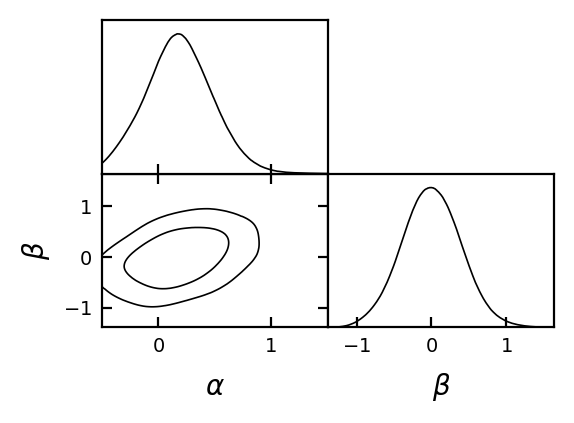

In [71]:
# Import corresponding modules from GetDist
from getdist.mcsamples import loadMCSamples, MCSamplesFromCobaya
import getdist.plots as gdplt

# Load the chains and the updated config file from the previous run
gd_sample = MCSamplesFromCobaya(updated_info, sampler.products()["sample"])

# Analyze the chains (print the mean and covmat according to GetDist documentation)
mean = gd_sample.getMeans()
covmat = gd_sample.getCovMat()
print("Mean:")
print(mean)
print("Covariance matrix:")
print(covmat.matrix)

# PLOT THE CHAINS (have a look at the DEMO above from GetDist)
g = gdplt.get_single_plotter(width_inch=3)
g.triangle_plot([gd_sample], ["a","b"])
# The goal is to produce a triangle plot

### Now, let's change the likelihood above by a new gaussian ring likelihood defined on cartesian coordinates

Cobaya allows to pass self-defined likelihoods as likelihoods of the `likelihood` block.

In [39]:
# We define the new likelihood as a python function
# ATTENTION: Cobaya always needs to return the loglike!

def gauss_ring_logp(x, y, mean_radius=1, std=0.02):
    """
    Defines a gaussian ring likelihood on cartesian coordinater,
    around some ``mean_radius`` and with some ``std``.
    """
    return stats.norm.logpdf(np.sqrt(x**2 + y**2), loc=mean_radius, scale=std)

In [44]:
gauss_ring_logp(gd_sample["a"], gd_sample["b"])

array([-1130.05899526,  -582.14006312,  -545.76532891, ...,
         -11.12172781,  -162.23540846,  -255.29289662])

In [45]:
# Let's update the new likelihood in the info dictionary above

info = {"likelihood": {"ring": gauss_ring_logp(gd_sample["a"], gd_sample["b"])}}

In [46]:
# The new likelihood requests two new parameters: x and y
# Therefore, we need to define them in the params block
# of the info dictionary above adding a new prior

# Use uniform distributions as priors for x and y between 0 and 2

info["params"] = {"x":{
                    "prior":{"min":-0.5,"max":3}},
                  "y":{
                    "prior":{"min":-0.5,"max":3}}
                  }

In [47]:
# We add the polar coordinates theta and radius as derived parameters within the params block

def get_r(x, y):
    return np.sqrt(x ** 2 + y ** 2)


def get_theta(x, y):
    return np.arctan(y / x)

# Update the params part of the info dictionary with these derived params

In [48]:
# We add some new conditions in the sampler block, to give extra tries in case the mcmc gets stuck

info["sampler"] = {"mcmc": {"Rminus1_stop": 0.001, "max_tries": 1000}}

# Re-run cobaya as we did above!

### Replot the chains using GetDist

We aim to create two triangle plots: one for the cartesian coordinates x and y, and another for the polar coordinates theta and radius

In [ ]:
# Load the chains and the updated config file from the previous run
# Make two triangle plots: one for the cartesian coordinates x and y,
# and a different triangle plot for the radius and angle theta

In [72]:
true_H0 = 73.0  # km/s/Mpc
true_M  = -19.3 # absolute magnitude
sn = make_synthetic_sample(N=200, H0=true_H0, M=true_M, rng=None)

NameError: name 'make_synthetic_sample' is not defined

# Exercise 2:

### Make an evaluation of the full posterior of the parameters of $\Lambda$CDM using BAO + SN + PLANCK18

In this exercise, we aim to make an evaluation of the posterior distribution of the Standard Cosmological Model parameters using BAO + SN + PLANCK18 data.

For that, you need to create a new config file speciying the corresponding likelihoods, the parameters of the $\Lambda$CDM model and specify the sampler to `evaluate`.

What about the `theory` module? Do you need to specify it? What would you choose?

If you feel like working, you can change the sampler `evaluate` to the sampler `mcmc` to explore the full posterior distribution. Attention: it will take around 3 or 4 days. Let it run for one night so that tomorrow you can have a look at the chains.

- Check this link to see how you can define the new corresponding config file: https://cobaya.readthedocs.io/en/latest/cosmo_basic_runs.html
- All the corresponding likelihood names are within the section “COSMOLOGICAL LIKELIHOODS” at https://cobaya.readthedocs.io/en/latest/

In [74]:
from dataclasses import dataclass
def loglike_cobaya(H0, M):
    return -0.5 * chi2(H0, M, sn)
def mu_from_z(z, H0):
    """Low-z luminosity distance modulus: mu = 5 log10(c z / H0 [Mpc]) + 25.
    Here c is in km/s, H0 in km/s/Mpc, so cz/H0 is in Mpc.
    """
    dL_Mpc = (c_km_s * z) / H0
    return 5.0 * np.log10(dL_Mpc) + 25.0

def mag_model(z, H0, M):
    return M + mu_from_z(z, H0)

def sigma_mu_pec(z, v_pec=300.0, H0=70.0):
    """Approximate magnitude uncertainty from peculiar velocities.
    sigma_mu ~ (5/ln(10)) * (sigma_dL/dL).
    At low z, dL ~ cz/H0, so fractional distance error from peculiar velocity sigma_v is ~ sigma_v/(cz).
    """
    frac = v_pec/(c_km_s * z)
    return (5/np.log(10)) * frac

@dataclass
class SNSample:
    z: np.ndarray
    m: np.ndarray
    sigma_m: np.ndarray
    name: str = "synthetic"

def make_synthetic_sample(N=100, H0=73.0, M=-19.3, zmin=0.01, zmax=0.08,
                          sigma_meas=0.1, sigma_int=0.1, v_pec=300.0, rng=None) -> SNSample:
    rng = np.random.default_rng(rng)
    z = np.sort(rng.uniform(zmin, zmax, size=N))
    mu = mu_from_z(z, H0)
    m_true = M + mu
    # per-SN error budget: measurement + peculiar velocity + intrinsic scatter
    sig_pec = sigma_mu_pec(z, v_pec=v_pec, H0=H0)
    sigma_tot = np.sqrt(sigma_meas**2 + sig_pec**2 + sigma_int**2)
    m_obs = rng.normal(m_true, sigma_tot)
    return SNSample(z=z, m=m_obs, sigma_m=sigma_tot, name="synthetic")

def chi2(H0, M, sn: SNSample):
    model = mag_model(sn.z, H0, M)
    return np.sum(((sn.m - model)/sn.sigma_m)**2)

def best_fit_H0_given_M(sn: SNSample, M, H0_grid=np.linspace(50, 90, 801)):
    chi2_vals = np.array([chi2(H0, M, sn) for H0 in H0_grid])
    j = np.argmin(chi2_vals)
    return H0_grid[j], chi2_vals, H0_grid
def conf_interval_from_delta_chi2(H0_grid, chi2_vals, dof=1, delta=1.0):
    # For 1 parameter, Delta chi^2 = 1 gives ~68% CI.
    j = np.argmin(chi2_vals)
    chi2_min = chi2_vals[j]
    mask = chi2_vals <= chi2_min + delta
    H0_in = H0_grid[mask]
    return H0_grid[j], H0_in.min(), H0_in.max()

# You need to start by defining a new config python dictionary
# (or if you feel brave, you can write a script like a yaml format
# and dump it as a python dictionary)

# LCDM has 6 parameters, so you need to define at least 6 parameters
# to be sampled from within the `params` block

info_dict = {
    "params":{
        "H0":{"prior":{"min":50,"max":90},"latex":r'H_0'},
        'M':{'prior':{'dist':'norm',"loc":-19.3,"scale":0.05}, 'latex':r'M'},
        },
    'likelihood': {
        'my_sn_likelyhood': {
            'external':loglike_cobaya,  }
        },
    'sampler':{'mcmc':{'max_tries':100000, 'Rminus1_stop':0.001}}
}

In [76]:
updated_info, sampler = run(info_dict)

INFO:my_sn_likelyhood:Initialized external likelihood.


[my_sn_likelyhood] Initialized external likelihood.


INFO:mcmc:Getting initial point... (this may take a few seconds)


[mcmc] Getting initial point... (this may take a few seconds)


INFO:prior:Reference values or pdfs for some parameters were not provided. Sampling from the prior instead for those parameters.


[prior] Reference values or pdfs for some parameters were not provided. Sampling from the prior instead for those parameters.


NameError: name 'sn' is not defined